<a href="https://colab.research.google.com/github/venussar/Roots-of-equations./blob/main/TAREA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/danielruizm16/ComputationalMethods/blob/main/Roots/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 03: Roots of equations.

---
### Teacher: Daniel Ruiz Mejía
### Name: CAROLINA ANDREA RODAS CASTAÑEDA
*Computational Methods 2025-II*

---

# 1.

The Halley's method is a root-finding algorithm that uses both the first and second derivatives of a function to achieve cubic convergence. Based on the following steps, write a function that calculates the root of a function. Test it to find the first positive root of $f(x)=\sin{(x)} +\cos{(1+x^2)}-1$. Examine the convergence as a function of the tolerance.

### Steps


1. **Initialization:**
    Start with an interval $[a, b]$ where $f(a)$ and $f(b)$ have opposite signs.
    - Start with an initial guess $x0$ close to the suspected root.

2. **Iteration Formula:**
    - At each iteration, evaluate $ f(x_n) $, $ f'(x_n) $, and $ f''(x_n) $.
    - Compute the next approximation $x_{n+1}$ using the formula:
    $$x_{n+1} = x_n - \frac{2f(x_n)f'(x_n)}{2[f'(x_n)]^2 - f(x_n)f''(x_n)}$$
    This formula is derived from the second-order Taylor expansion and provides cubic convergence.

3. ***Convergence Check:**
   - Evaluate $ f(x_{n+1}) $.
   - If $ |f(x_{n+1})| < \text{tolerance} $ or $ |x_{n+1} - x_n| < \text{tolerance} $, then $ x_{n+1} $ is the approximate root.
   - Otherwise, set $ x_n = x_{n+1} $ and repeat the process.

5. **Stopping Criteria**:
   - The iteration stops when either the function value is sufficiently close to zero or the change in the approximate root is smaller than a specified tolerance.
   - A maximum number of iterations should also be specified to prevent infinite loops.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x):
  f= np.sin(x)+np.cos(1+x**2)-1 #Función base
  return f

In [ ]:
def Pderivada(x):
  Pderivada= np.cos(x)-2*x*np.sin(1+x**2) #Primera derivada
  return Pderivada

In [ ]:
def Sderivada(x): #Segunda derivada
  return -np.sin(x) - 2*np.sin(1 + x**2) - 4*x**2 * np.cos(1 + x**2)

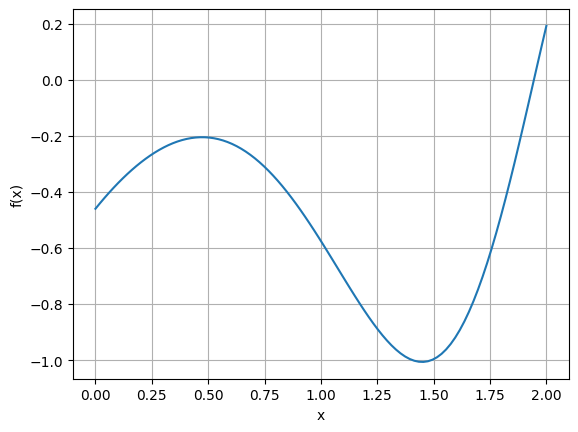

In [ ]:
x= np.linspace(0,2, 100)   #grafico para ver la raiz
y= f(x)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()

In [ ]:
def Halley(funcion,a,b,tol=1e-7,Nmax=100):
  if funcion(a) < funcion(b):
    x0=1.7
    for i in range(Nmax):
      f_x0=funcion(x0)
      fprimera=Pderivada(x0)
      fsegunda=Sderivada(x0)

      x1 = x0 - (2 * f_x0 * fprimera) / (2 * (fprimera**2) - f_x0 * fsegunda)

      if abs(funcion(x1)) < tol or abs(x1 - x0) < tol:
        return x1
      x0 = x1

In [ ]:
Halley(f,1.7,2)  #LA RAIZ

np.float64(1.9446084250825613)

In [ ]:
# Comparar convergencia segun la tolerancia
tolerancias = [1e-3, 1e-5, 1e-7]
print("convergencia del metodo de Halley")
for tol in tolerancias:
    raiz = Halley(f, 1, 2, tol=tol)
    print(f"Tolerancia: {tol}")
    print(f"Raiz encontrada: {raiz}")
    print(f"f(raiz) = {f(raiz)}")
    print("-" * 40)


convergencia del metodo de Halley
Tolerancia: 0.001
Raiz encontrada: 1.9443907325180847
f(raiz) = -0.0007651377419233274
----------------------------------------
Tolerancia: 1e-05
Raiz encontrada: 1.9446084250825613
f(raiz) = -1.0300671426932695e-10
----------------------------------------
Tolerancia: 1e-07
Raiz encontrada: 1.9446084250825613
f(raiz) = -1.0300671426932695e-10
----------------------------------------


# 2

A total charge $Q$ is uniformly distributed around a ring-shaped conductor of radius $a$. A charge $q$ is located at a distance $x$  horizontally across the center of the ring. The force exerted on the charge by the ring is given by::

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

where $q$ y $Q$ de $ 3 \times 10^{-5}$ C.

  - Plot $F(x)$ for a ring of radius $a= 0.85$ m for $0\leq x\leq 2$ m
  - Using the Newton-Raphson method and the fixed-point method, find the value of $x$ at which the force equals 1.25 N.
  - Determine what happens if we decrease the radius with respect to the force experienced by the charge $q$.

In [ ]:
eps0 = 8.854187817e-12
q = 3e-5
Q=  3e-5
a = 0.85
f=1.25

In [ ]:
def funcionCargas(x):
  f= (1 / (4 * np.pi * eps0)) * (q * Q * x) / ((x**2 + a**2)**(3/2))
  return f


In [ ]:
def g(x):
  g=((4 * np.pi * eps0)*((x**2 + a**2)**(3/2))*f)/(q*Q)
  return g

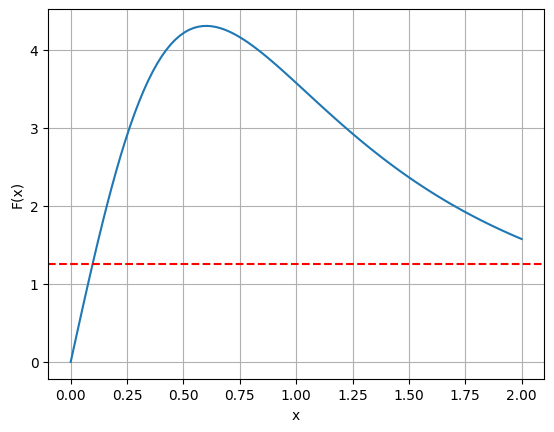

In [ ]:
x= np.linspace(0,2, 100)
y= funcionCargas(x)
plt.plot(x,y)
plt.axhline(y=1.25, color='r', linestyle='--')
plt.xlabel("x")
plt.ylabel("F(x)")
plt.grid()

In [ ]:
def puntoFijo(funcion,x0,tol=1e-7,Nmax=100):
  xn=x0
  for i in range(Nmax):
    x_anterior=xn
    xn=funcion(x_anterior)

    if abs(xn-x_anterior)<tol:
      return xn


RAIZ CON EL METODO DE PUNTO FIJO

In [ ]:
print("la raiz en metros es", puntoFijo(g,0))


la raiz en metros es 0.096754083064262


METODO DE NEWTON

In [ ]:
def F(x):
  return  funcionCargas(x)-1.25

In [ ]:
def derivada(x):
  return (1 / (4 * np.pi * eps0)) * (q * Q * (a**2 - 2*x**2)) / ((x**2 + a**2)**(5/2))


In [ ]:
def newton(funcion,derivada,x0,tol=1e-7,Nmax=100):
   x = x0
   for i in range(Nmax):
        fx = funcion(x)
        dfx = derivada(x)

        if dfx == 0:  # Avoid division by zero
         raise ValueError("Derivative equal to zero")

        x_new = x - fx / dfx
        error = abs(x_new - x)

        if error < tol:
            return x_new

        x = x_new
        return x

In [ ]:
newton(F,derivada,0.1)

0.09674755499028585

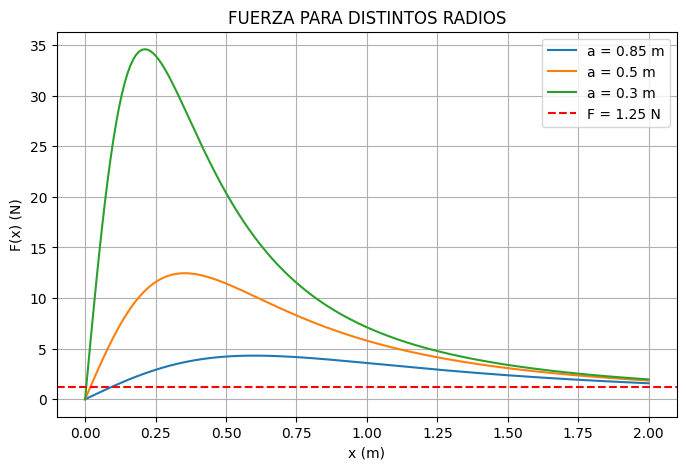

In [ ]:
a_values = [0.85, 0.5, 0.3]  # distintos radios
x = np.linspace(0, 2, 200)

plt.figure(figsize=(8,5))
for a in a_values:
    F = (1 / (4 * np.pi * eps0)) * (q * Q * x) / ((x**2 + a**2)**(3/2))
    plt.plot(x, F, label=f"a = {a} m")

plt.axhline(1.25, color='r', linestyle='--', label='F = 1.25 N')
plt.xlabel("x (m)")
plt.ylabel("F(x) (N)")
plt.title("FUERZA PARA DISTINTOS RADIOS")
plt.legend()
plt.grid()
plt.show()


# 3.
Kepler's equation plays a central role in classical celestial mechanics, because it enables the calculation of angular positions for orbiting objects. For an elliptical orbit, it relates the mean anomaly $M$, the eccentric anomaly $E$, and the eccentricity $e = \sqrt{1 - b^2/a^2}$ ($a > b$ are semiaxes):

$$M = E - e \sin E.$$


The anomalies are defined by astronomers as angular positions: the mean anomaly $M$ is the angular position of the object on a fictitious circular orbit, and, assuming constant angular velocity, it can be related to the lapse of time since the passage through the perihelion:

$$M = \frac{2\pi}{T} (t - t_0),$$


where $T$ is the orbital period and $t_0$ is the time when the object was at the perihelion.

For the Halley comet, the relevant parameters have the values: $e = 0.9672671$, $T = 75.9600$ years, and $t_0 = 1986.1113$ years (on February 9, 1986).

- Find the eccentric anomaly $E$ of the Halley comet on April 1, 1986, for $t = 1986.2491$. To this end, plot the function

$$f(E) = E - e \sin E - M,$$


for $E \in [0, 1]$ to make sure that the interval contains a single zero and determine it by bisection method.

- Plot $E = E(t)$ for a whole period of revolution by using Newton's and secant method to solve

$$E - e \sin E - M(t) = 0,$$


with a time step $\Delta t = T/100$. Use as initial approximation for each new moment of time, $t_i = t_0 + (i - 1) \Delta t$, the previous value $E(t_{i-1})$, starting with $E(t_0) = 0$.

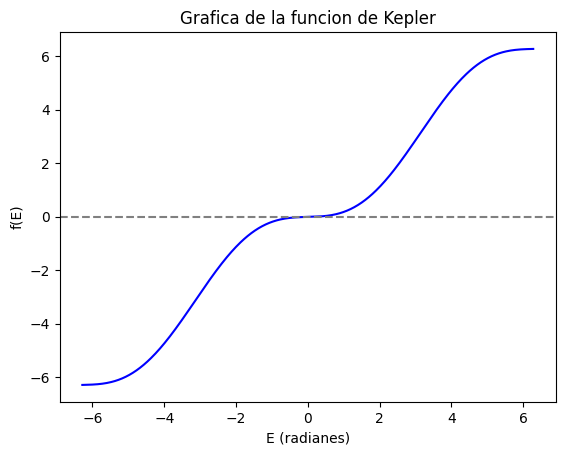

La solucion aproximada (anomalia excentrica E) es: 0.260986328125


In [ ]:


# Datos del problema
e = 0.9672671   # excentricidad
T = 75.9600     # periodo
t0 = 1986.1113  # tiempo del perihelio
t_april = 1986.2491  # tiempo en abril

# Calcular la anomalia media (M)
M = (2 * np.pi / T) * (t_april - t0)

# Funcion para la ecuacion de Kepler: E - e*sin(E) - M = 0
def ecuacion_kepler(E):
    return E - e * np.sin(E) - M

# Metodo de biseccion para encontrar la raiz de la funcion
def biseccion(func, x1, x2, tolerancia=1e-6, max_intentos=100):
    # primero revisar que haya cambio de signo
    if func(x1) * func(x2) >= 0:
        print("No hay cambio de signo en el intervalo dado")
        return None

    for i in range(max_intentos):
        xm = (x1 + x2) / 2  # punto medio
        f_xm = func(xm)

        if abs(f_xm) < tolerancia:
            return xm  # se encontro la raiz

        if func(x1) * f_xm < 0:
            x2 = xm
        else:
            x1 = xm

    print("No se encontro la raiz en el numero maximo de intentos")
    return None

# Para ver el comportamiento de la funcion y elegir intervalo
valores_E = np.linspace(-2*np.pi, 2*np.pi, 500)
valores_f = ecuacion_kepler(valores_E)

# Graficar la funcion
plt.plot(valores_E, valores_f,  color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("E (radianes)")
plt.ylabel("f(E)")
plt.title("Grafica de la funcion de Kepler")
plt.show()

# Elegir intervalo donde se ve que hay cambio de signo (mirando la grafica)
E_raiz = biseccion(ecuacion_kepler, -2, 2)
print("La solucion aproximada (anomalia excentrica E) es:", E_raiz)


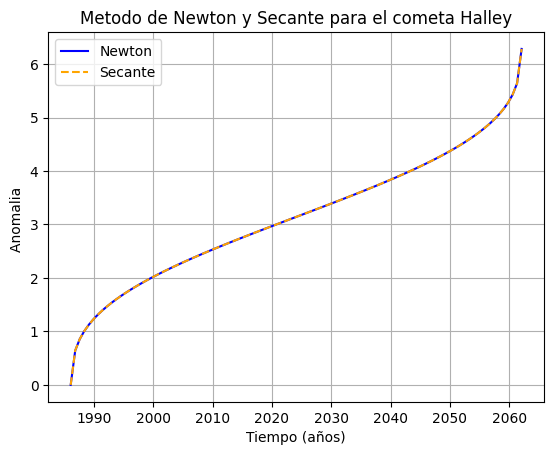

In [ ]:


# Lista de tiempos (100 pasos en toda la orbita)
pasos = 100
dt = T / pasos
tiempos = [t0 + i * dt for i in range(pasos + 1)]

# Guardar resultados
E_newton = [0]   # E en t0 es 0
E_secante = [0]

# Paso pequeño para iniciar el metodo de la secante
delta = 0.01

# Recorremos todos los tiempos
for i in range(1, len(tiempos)):
    t = tiempos[i]
    M = (2 * np.pi / T) * (t - t0)

    # Definir f(E) y su derivada
    def f(E):
        return E - e * np.sin(E) - M

    def df(E):
        return 1 - e * np.cos(E)

    # Metodo de Newton
    E0 = E_newton[-1]
    for _ in range(100):
        fval = f(E0)
        dval = df(E0)
        if abs(fval) < 1e-8:
            break
        E0 = E0 - fval / dval
    E_newton.append(E0)

    # Metodo de la secante
    E1 = E_secante[-1]
    E2 = E1 + delta
    for _ in range(100):
        f1 = f(E1)
        f2 = f(E2)
        if abs(f2) < 1e-8:
            break
        if f2 - f1 == 0:
            break
        E3 = E2 - f2 * (E2 - E1) / (f2 - f1)
        E1, E2 = E2, E3
    E_secante.append(E2)

# Graficar resultados
plt.plot(tiempos, E_newton, label="Newton", color="blue")
plt.plot(tiempos, E_secante, label="Secante", color="orange", linestyle='--')
plt.xlabel("Tiempo (años)")
plt.ylabel("Anomalia ")
plt.title("Metodo de Newton y Secante para el cometa Halley")
plt.legend()
plt.grid(True)
plt.show()


Ambos metodos permiten calcular la posicion del cometa en el tiempo.
Newton es mas rapido, pero la secante es util si no se conoce la derivada.

# 4.
The intensity distribution in Fraunhofer diffraction by a slit of width $W$ and infinite height, illuminated by monochromatic light of wavelength $\lambda$, is given by:

$$I(\theta) = I_0 \left[ \frac{\sin(\pi W \sin \theta / \lambda)}{\pi W \sin \theta / \lambda} \right]^2,$$

where $\theta$ is the observation angle relative to the incident direction. Introducing the dimensionless variable:

$$x = \pi W \sin \theta / \lambda,$$

the intensity and its derivative are expressed as:

$$I(x) = I_0 \left( \frac{\sin x}{x} \right)^2, \quad I(0) = I_0,$$
$$I'(x) = \frac{2I_0}{x} \left( \cos x - \frac{\sin x}{x} \right) \frac{\sin x}{x}, \quad I'(0) = 0.$$

- Plot $I(x)$ and $I'(x)$ in the interval $x \in [-10, 10]$.

- Calculate the value $x_{1/2}$ (positive) where $I(x) = I_0/2$, by solving the equation $I(x) - I_0/2 = 0$ with the secant method.

- Find the local maxima $x_i \in [-10, 10]$ by solving $I'(x) = 0$, use a step $h = 0.5$ to separate the roots and apply the regula falsi method to keep them bounded.

**Note:**
You may take $I_0=1$.

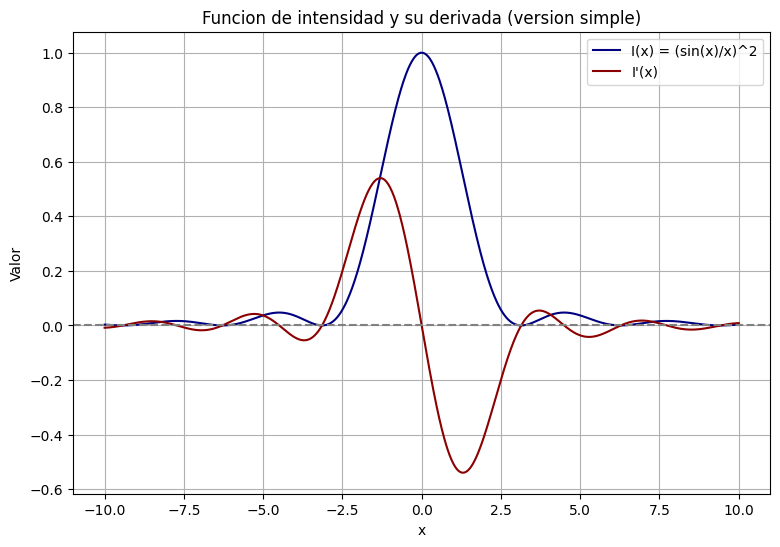

In [ ]:

# Funcion
def intensidad(x):
    # Para evitar division por cero, usamos np.where para asignar 1 cuando x=0
    y = np.where(x == 0, 1.0, (np.sin(x) / x)**2)
    return y

# Derivada
def derivada_intensidad(x):
    # Usamos np.where para manejar x=0 evitando division cero
    val = np.where(
        x == 0,
        0.0,
        (2/x) * (np.cos(x) - np.sin(x)/x) * (np.sin(x)/x)
    )
    return val

# Valores de x
x_vals = np.linspace(-10, 10, 1000)

# Calculo vectorizado de I(x) y dI/dx
I_vals = intensidad(x_vals)
dI_vals = derivada_intensidad(x_vals)

# Graficar ambas funciones
plt.figure(figsize=(9,6))
plt.plot(x_vals, I_vals, label='I(x) = (sin(x)/x)^2', color='navy')
plt.plot(x_vals, dI_vals, label="I'(x)", color='darkred')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('x')
plt.ylabel('Valor')
plt.title('Funcion de intensidad y su derivada')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# En x=0 definimos que I(0)=1 para evitar diidir entre cero
def I(x):
    if x == 0:
        return 1.0
    else:
        return (np.sin(x)/x)**2

# Derivada de I(x), cuidado en x=0 para no dividir entre cero
def dI(x):
    if x == 0:
        return 0.0
    return (2/x) * (np.cos(x) - np.sin(x)/x) * (np.sin(x)/x)


def secante(f, x0, x1, tol=1e-6, max_iter=100):
    for _ in range(max_iter):
        f0, f1 = f(x0), f(x1)
        if f1 - f0 == 0:  # Evitar division por cero
            break
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        if abs(x2 - x1) < tol:
            return x2
        x0, x1 = x1, x2  # Actualizar puntos para siguiente iteracion
    return x2  # Mejor aproximacion

# Metodo regula falsi para encontrar raiz en [a,b]
# Se asegura que f(a) y f(b) tengan signos opuestos
def regula_falsi(f, a, b, tol=1e-6, max_iter=100):
    if f(a)*f(b) >= 0:
        print("Error: f(a) y f(b) deben tener signos opuestos")
        return None
    for _ in range(max_iter):
        fa, fb = f(a), f(b)
        c = (a*fb - b*fa) / (fb - fa)  # Punto donde la recta corta el eje x
        fc = f(c)
        if abs(fc) < tol:
            return c
        if fa * fc < 0:
            b = c
        else:
            a = c
    return c

# Queremos encontrar x donde I(x) = 0.5
# Es raiz de f_medio(x) = I(x) - 0.5
f_medio = lambda x: I(x) - 0.5
x_medio = secante(f_medio, 1, 2)
print(f"x donde I(x) = 0.5 (metodo secante): {x_medio}")

# Buscamos maximos locales, donde derivada es cero
# Recorremos de -10 a 10 buscando cambios de signo en dI(x)
raices = []
x = -10
paso = 0.5
while x < 10:
    if dI(x)*dI(x + paso) < 0:
        r = regula_falsi(dI, x, x + paso)
        raices.append(r)
    x += paso

print("\nMaximos locales en [-10,10]:")
for r in raices:
    print(f"x = {r}")


x donde I(x) = 0.5 (metodo secante): 1.3915573782515103

Maximos locales en [-10,10]:
x = -9.424778908059865
x = -7.725251879794755
x = -6.283200785726028
x = -4.4934100239108865
x = -3.1415941163077403
x = 3.1415941163077403
x = 4.4934100239108865
x = 6.283200785726028
x = 7.725251879794755
x = 9.424778908059865


# 5.

There is a point between the Earth and the Moon, called the Lagrange point $L_1$, where a satellite will orbit the Earth in perfect synchrony with the Moon, always remaining between the two. This works because the inward pull from the Earth and the outward pull from the Moon combine to create exactly the necessary centripetal force to keep the satellite in its orbit.

Assuming circular orbits and that the Earth is much more massive than the Moon or the satellite, the distance $r$ from the center of the Earth to the point $L_1$ satisfies:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,$$

where $M$ and $m$ are the masses of the Earth and the Moon respectively, $G$ is Newton's gravitational constant and $ \omega $ is the angular velocity of both the Moon and the satellite.The equation above is a fifth-degree polynomial equation in $r$ (also called a quintic equation). This type of equation cannot be solved exactly in closed form, but it is straightforward to solve numerically.

Write a program that uses Newton's method or the secant method to solve for the distance $r$ from the Earth to the $L_1$ point.

The values of the various parameters are:

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2},$$

$$M = 5.974 \times 10^{24} \, \text{kg},$$

$$m = 7.348 \times 10^{22} \, \text{kg},$$

$$R = 3.844 \times 10^8 \, \text{m},$$

$$\omega = 2.662 \times 10^{-6} \, \text{s}^{-1}.$$

You will also need to choose a suitable initial value for $r$, or two initial values if you use the secant method.

In [ ]:
# Constantes fisicas
G = 6.674e-11       # Constante gravitacional (m^3/kg/s^2)
M_tierra = 5.974e24 # Masa Tierra (kg)
M_luna = 7.348e22   # Masa Luna (kg)
dist_TL = 3.844e8   # Distancia Tierra-Luna (m)
omega = 2.662e-6    # Velocidad angular (rad/s)

# Funcion que calcula la fuerza neta en un punto r desde la Tierra
def fuerza_neta(r):
    if r == 0 or r == dist_TL:
        return 1e10  # Para evitar division por cero
    f_grav_tierra = G * M_tierra / r**2
    f_grav_luna = G * M_luna / (dist_TL - r)**2
    f_centrifuga = omega**2 * r
    return f_grav_tierra - f_grav_luna - f_centrifuga

# Derivada numerica aproximada de una funcion en un punto r
def derivada(f, r, h=1e-6):
    return (f(r + h) - f(r - h)) / (2*h)

# Metodo de Newton para encontrar raiz
def metodo_newton(f, df, x_inicial, tolerancia=1e-6, max_iter=100):
    x = x_inicial
    for _ in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if dfx == 0:
            print("Derivada cero, no se puede continuar")
            return None
        x_nuevo = x - fx / dfx
        if abs(x_nuevo - x) < tolerancia:
            return x_nuevo
        x = x_nuevo
    return x

# Metodo de la secante para encontrar raiz
def metodo_secante(f, x0, x1, tol=1e-6, max_iter=100):
    for _ in range(max_iter):
        f0, f1 = f(x0), f(x1)
        denom = f1 - f0
        if denom == 0:
            print("Division por cero en secante")
            return None
        x2 = x1 - f1 * (x1 - x0) / denom
        if abs(x2 - x1) < tol:
            return x2
        x0, x1 = x1, x2
    return x2

# Derivada de la funcion fuerza_neta usando derivada numerica
def dfuerza(r):
    return derivada(fuerza_neta, r)

# Calculamos L1 con ambos metodos
r_L1_newton = metodo_newton(fuerza_neta, dfuerza, 3.2e8)
r_L1_secante = metodo_secante(fuerza_neta, 3.0e8, 3.5e8)

# Resultados
print(f"L1 con Newton: {r_L1_newton:.3e} m")
print(f"L1 con Secante: {r_L1_secante:.3e} m")
print(f"Distancia desde la Luna (Newton): {dist_TL - r_L1_newton:.3e} m")
print(f"Distancia desde la Luna (Secante): {dist_TL - r_L1_secante:.3e} m")


L1 con Newton: 3.260e+08 m
L1 con Secante: 3.260e+08 m
Distancia desde la Luna (Newton): 5.835e+07 m
Distancia desde la Luna (Secante): 5.835e+07 m
